In [1]:
import csv

import numpy as np
from matplotlib import pyplot as plt
import scipy.fftpack

In [2]:
%matplotlib widget

In [3]:
data = np.genfromtxt('data/Netzfrequenz_Sekundenwerte_2012_KW37.csv', delimiter=',')[1:,1:]

FileNotFoundError: data/Netzfrequenz_Sekundenwerte_2012_KW37.csv not found.

NameError: name 'data' is not defined

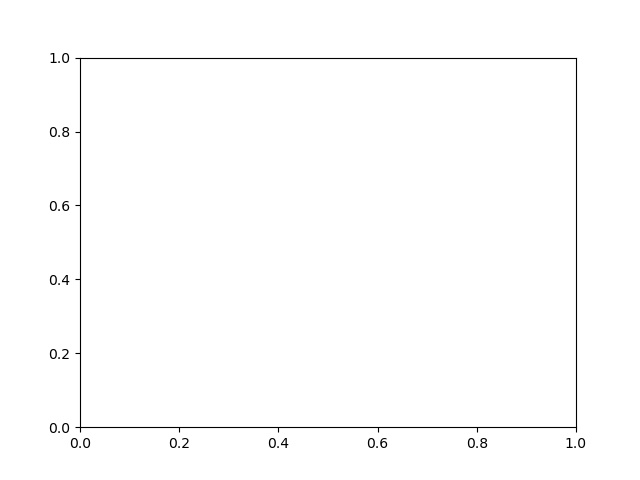

In [4]:
fig, ax = plt.subplots()
ax.plot(data[:3600*24, 0])

In [5]:
np.std(data[:,0])

0.02051102806199375

In [6]:
# Number of samplepoints
N = len(data[:,0])
# sample spacing
T = 1.0
x = np.linspace(0.0, N*T, N)
yf = scipy.fftpack.fft(data[:,0])
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

yf = 2.0/N * np.abs(yf[:N//2])

#yf = sum(yf[s::10] for s in range(10)) / 10
#xf = sum(xf[s::10] for s in range(10)) / 10

fig, ax = plt.subplots()
ax.loglog(xf, yf)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _pos: f'{1/x:.1f}'))
ax.set_xlabel('T in s')
ax.set_ylabel('Amplitude Δf')
ax.grid()
ax.set_xlim([1/1000000, 0.5])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(1e-06, 0.5)

In [7]:
# Number of samplepoints
N = len(data[:,0])
# sample spacing
T = 1.0
x = np.linspace(0.0, N*T, N)
yf = scipy.fftpack.fft(data[:,0])
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

yf = 2.0/N * np.abs(yf[:N//2])

average_from = lambda val, start, average_width: np.hstack([val[:start], [ np.mean(val[i:i+average_width]) for i in range(start, len(val), average_width) ]])

average_width = 20
average_start = 100
yf = average_from(yf, average_start, average_width)
xf = average_from(xf, average_start, average_width)
yf = average_from(yf, 300, average_width)
xf = average_from(xf, 300, average_width)

fig, ax = plt.subplots()
ax.loglog(xf, yf)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _pos: f'{1/x:.1f}'))
ax.set_xlabel('T in s')
ax.set_ylabel('Amplitude Δf')

for i, t in enumerate([45, 60, 600, 1200, 1800, 3600]):
    ax.axvline(1/t, color='red', alpha=0.5)
    ax.annotate(f'{t} s', xy=(1/t, 3e-3), xytext=(-15, 0), xycoords='data', textcoords='offset pixels', rotation=90)
#ax.text(1/60, 10,'60 s', ha='left')
ax.grid()
ax.set_xlim([1/60000, 0.5])
ax.set_ylim([5e-7, 2e-2])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(5e-07, 0.02)

In [8]:
ys = scipy.fftpack.fft(data[:,0])
ys = 2.0/len(data) * np.abs(ys[:len(data)//2])
s = 60

ys = np.convolve(ys, np.ones((s,))/s, mode='valid')

xs = np.linspace(0, 1.0/2.0, len(data)//2)
#xs = np.linspace(len(data)/2, 1, len(data)/2)

fig, ax = plt.subplots()
ax.loglog(xs[s//2:-s//2+1], ys)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _pos: 1/x))
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [9]:
ys = scipy.fftpack.fft(data[:,0])
ys = 2.0/len(data) * np.abs(ys[:len(data)//2])
s = 1

ys = np.convolve(ys, np.ones((s,))/s, mode='valid')

xs = np.linspace(0, 1.0/2.0, len(data)//2)
#xs = np.linspace(len(data)/2, 1, len(data)/2)

fig, ax = plt.subplots()
ax.loglog(xs[s//2:-s//2+1 if s > 1 else None], ys)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _pos: 1/x))
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [10]:
ys = scipy.fftpack.fft(data[:,0])
ys = 2.0/len(data) * np.abs(ys[:len(data)//2])
s = 1

ys = np.convolve(ys, np.ones((s,))/s, mode='valid')

xs = np.linspace(0, 1.0/2.0, len(data)//2)

ys *= 2*np.pi*xs
#xs = np.linspace(len(data)/2, 1, len(data)/2)

fig, ax = plt.subplots()
ax.loglog(xs[s//2:-s//2+1 if s > 1 else None], ys)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _pos: 1/x))
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [11]:
ys = scipy.fftpack.fft(data[:,0])
ys = 2.0/len(data) * np.abs(ys[:len(data)//2])
s = 30

ys = np.convolve(ys, np.ones((s,))/s, mode='valid')

xs = np.linspace(0, 1.0/2.0, len(data)//2)

ys *= 2*np.pi*xs[s//2:-s//2+1]

#xs = np.linspace(len(data)/2, 1, len(data)/2)

fig, ax = plt.subplots(figsize=(9,5))
ax.loglog(xs[s//2:-s//2+1], ys)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _pos: 1/x))
ax.grid()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
1/0.0628

15.923566878980893